### Aula 2: Exercícios

Para estes exercícios, iremos utilizar duas bases:

1) base fictícia de funcionários criada por cientistas de dados da IBM.

**Variáveis:**
- **Age:** Idade
- **Attrition:** Se saiu da empresa (Sim ou não)
- **BusinessTravel:** Frequência de viagens a trabalho
- **DailyRate:** Custo do funcionário por dia
- **Department:** Departamento
- **DistanceFromHome:** Distância do trabalho até a casa do funcionário
- **Education:** Nível de educação:
    - 1: 'Below College'
    - 2: 'College'
    - 3: 'Bachelor'
    - 4: 'Master'
    - 5: 'Doctor'
- **EducationField:** Área da educação
- **EmployeeNumber:** ID do funcionário
- **EnvironmentSatisfaction:** Satisfação com o ambiente de trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **Gender:** Gênero
- **HourlyRate:** Valor/hora
- **JobInvolvement:** Nível de envolvimento com o trabalho (psicologica e emocionalmente):
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **JobLevel:** Nível do funcionário
- **JobRole:** Cargo
- **JobSatisfaction:** Nível de satisfação com o trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **MaritalStatus:** Estado Civil
- **NumCompaniesWorked:** Número de empresas que já trabalhou
- **PercentSalaryHike:** Aumento salarial (%)
- **PerformanceRating:** Nível de performance:
    - 1: 'Low'
    - 2: 'Good'
    - 3: 'Excellent'
    - 4: 'Outstanding'
- **RelationshipSatisfaction:** Satisfação de relacionamento:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **TotalWorkingYears:** Número de anos trabalhados
- **TrainingTimesLastYear:** Número de treinamentos no ano anterior
- **WorkLifeBalance:** Equilíbrio da vida profissional
    - 1: 'Bad'
    - 2: 'Good'
    - 3: 'Better'
    - 4: 'Best'
- **YearsAtCompany:** Anos na empresa
- **YearsInCurrentRole:** Anos na posição atual
- **YearsSinceLastPromotion:** Anos desde a última promoção
- **YearsWithCurrManager:** Anos com o mesmo gestor

2) Base de dados de casos e óbitos de covid no estado de SP.

- **nome_munic:** Nome do município
- **codigo_ibge:** Código do município no IBGE (7 dígitos)
- **casos_novos:** Casos novos registrados na data
- **obitos_novos:** Óbitos novos registrados na data
- **nome_drs:** Nome do Dpto. Regional de Saúde
- **cod_drs:** Código do Dpto. Regional de Saúde
- **pop:** População Estimada (fonte: SEADE)
- **pop60:** População acima de 60 anos (fonte: SEADE)
- **ano_mes:** Ano e mês dos dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('./data/IBM_Employees.csv')

In [3]:
df2 = pd.read_csv('./data/dados_covid_sp_20.csv')

In [4]:
df2.sample(15)

,nome_munic,codigo_ibge,nome_drs,cod_drs,pop,pop_60,ano_mes,casos_novos,obitos_novos
2816,São José dos Campos,3549904,Taubaté,17.0,710654.0,103840.0,2020-03,9,0
1100,Ibiúna,3519709,Sorocaba,6.0,76430.0,10936.0,2020-02,0,0
2596,Santa Maria da Serra,3547007,Piracicaba,11.0,6141.0,793.0,2020-03,0,0
2198,Pompéia,3540002,Marília,5.0,21282.0,3745.0,2020-05,1,0
3034,Trabiju,3554755,Araraquara,8.0,1703.0,281.0,2020-06,0,0
221,Avaí,3504305,Bauru,12.0,5288.0,853.0,2020-03,0,0
123,Arandu,3503109,Bauru,12.0,6165.0,1030.0,2020-05,1,0
2177,Pitangueiras,3539509,Ribeirão Preto,1.0,38584.0,4770.0,2020-04,1,1
660,Corumbataí,3512704,Piracicaba,11.0,3962.0,671.0,2020-02,0,0
716,Cândido Mota,3510005,Marília,5.0,30019.0,5524.0,2020-03,0,0


## Exercício 1:
Utilizando a base de dados de covid:

**a)** Faça um gráfico de barras mostrando o total de óbitos (considerando todos os meses) para todos os DRS, excluindo a Grande São Paulo. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom e intercale as barras com as cores 'red' e 'green'.

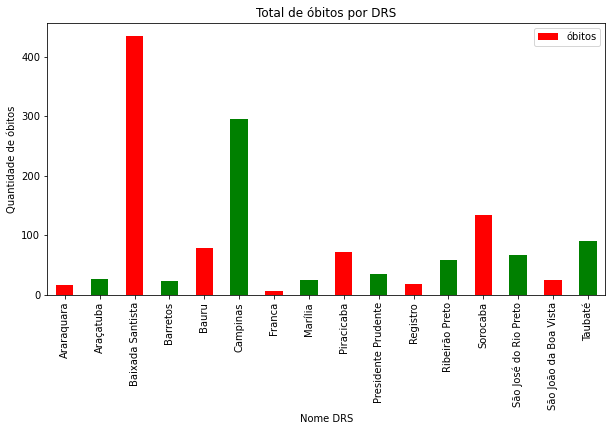

In [21]:
df2[df2['nome_drs']!='Grande São Paulo'].groupby(['nome_drs'], as_index=False).sum()\
.plot( x='nome_drs', y='obitos_novos', kind='bar', figsize=(10,5), title='Total de óbitos por DRS', color=['red','green'],\
      label='óbitos',xlabel='Nome DRS', ylabel='Quantidade de óbitos');

**b)**  Faça um gráfico de barras horizontal mostrando o total de óbitos no mês de abril para 3 DRS da sua escolha. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom.

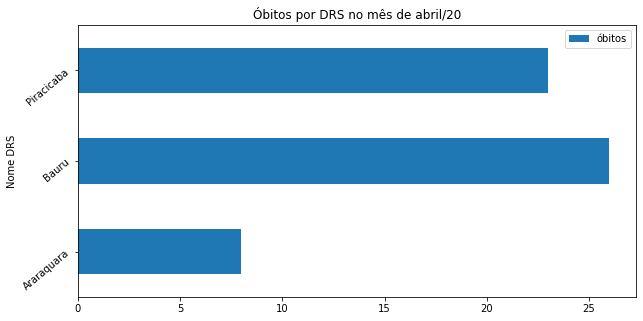

In [26]:
city = ['Araraquara', 'Bauru', 'Piracicaba']

df2[df2['nome_drs'].isin(city)
   & (df2.ano_mes=='2020-04')].groupby(['nome_drs'], as_index=False).sum()\
.plot(x='nome_drs', y='obitos_novos', kind='barh', figsize=(10,5),\
      title='Óbitos por DRS no mês de abril/20', label='óbitos', xlabel='Nome DRS', rot=40);

## Exercício 2

**a)** Utilizando a base de dados da IBM, crie um histograma para as idades dos funcionários, separando por gênero.

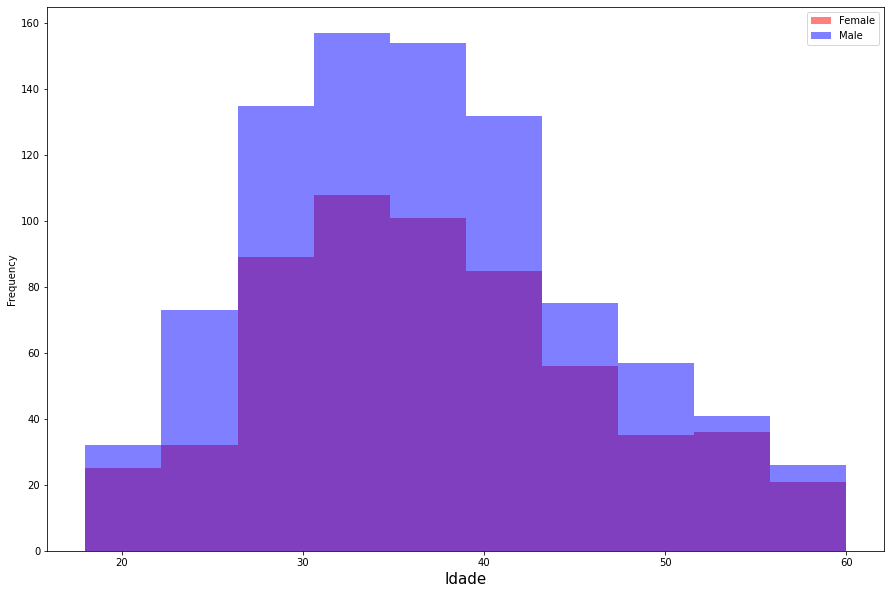

In [52]:
graph = lambda df,gender,_color,_ax=None : \
df[df['Gender']==gender].plot(y='Age', kind='hist', bins=10, figsize=(15,10), alpha=.5,label=gender, color=_color,ax=_ax)

ax_hist = graph(df1,'Female','red')
ax_hist.set_xlabel('Idade', fontsize=15);

ax_hist2 = graph(df1,'Male','blue',ax_hist)

**b)** Faça agora um boxplot das idades, por gênero.

In [67]:
import matplotlib.pyplot as plt

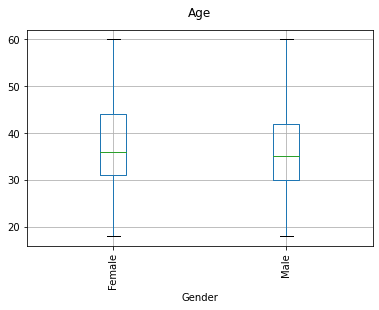

In [123]:
fig = df1.boxplot(column='Age', by='Gender', rot=90)
fig.get_figure().suptitle('Age');
plt.title('');